In [1]:
# IMPORT TOOLS
import sys
import subprocess
import os
# sys.path.insert(1, f"{subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')}/logistics/tools")
TOOLS_PATH = f"{os.getenv('MASTER_PROJECT_ROOT_FOLDER')}/logistics"
sys.path.insert(0, TOOLS_PATH)
from tools  import image_to_thesis
image_to_thesis.pull_from_thesis()
# ------------

ModuleNotFoundError: No module named 'git'

NameError: name 'image_to_thesis' is not defined

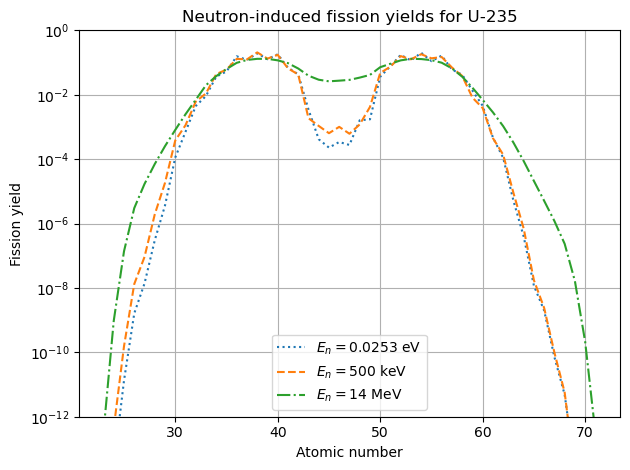

In [23]:
# Data from https://wwwndc.jaea.go.jp/cgi-bin/FPYfig?xpar=z&eng=e1&eng=e2&eng=e3&zlog=set

import matplotlib.pyplot as plt
import numpy as np

folder_name = "plot_149.126.75.4_20230227222823_plotdata"
def file_name(i: int):
    return f"plot_149.126.75.4_20230227222823_{i:02d}"

energies = ["0.0253 eV", "500 keV", "14 MeV"]
formats = [":", "--", "-."]

for i, energy in enumerate(energies):
    data = np.loadtxt(f"{folder_name}/{file_name(i+1)}", skiprows=4)
    
    # The data is now in [atomic number, yield] format. Convert to list of atomic numbers and list of yields.
    Z = data[:,0]
    yield_ = data[:,1]

    plt.plot(Z, yield_, label=f"$E_n=${energy}", linestyle=formats[i])

plt.xlabel("Atomic number")
plt.ylabel("Fission yield")
plt.legend()
plt.grid()
plt.yscale("log")
plt.title("Neutron-induced fission yields for U-235")
plt.ylim(1e-12, 1e0)
plt.tight_layout()
plt.savefig("fission_yields_u235.pdf")


image_to_thesis.save(plt, image_to_thesis.ThesisSection.THEORY, "fission_yields_u235.pdf")

plt.show()